## Visualisation des données

In [1]:
import pandas as pd

import os

In [2]:
#Répertoire du fichier de données
RAWFILES_DIR = '../data/raw/'
PROCESSED_DIR = '../data/processed/'

#Table principale
ALL_DATA_FILE = 'all_data.csv'

In [3]:
epidemie_df = pd.read_csv(os.path.join(PROCESSED_DIR, ALL_DATA_FILE), parse_dates=['Last Update'])

In [4]:
epidemie_df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,source
0,Anhui,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN,31.8257,117.2264,01-22-2020.csv
1,Beijing,Mainland China,2020-01-22 17:00:00,14.0,NaN,NaN,40.1824,116.4142,01-22-2020.csv
2,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,NaN,NaN,30.0572,107.8740,01-22-2020.csv
3,Fujian,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN,26.0789,117.9874,01-22-2020.csv
4,Gansu,Mainland China,2020-01-22 17:00:00,NaN,NaN,NaN,36.0611,103.8343,01-22-2020.csv


In [5]:
epidemie_df.dtypes

Province/State            object
Country/Region            object
Last Update       datetime64[ns]
Confirmed                float64
Deaths                   float64
Recovered                float64
Latitude                 float64
Longitude                float64
source                    object
dtype: object

## Epidémie en France

In [6]:
import seaborn as sns

sns.set()

In [17]:
%matplotlib inline

In [40]:
epidemie_df[(epidemie_df['Country/Region'] == 'France') & (epidemie_df['Province/State'] == 'France')].sort_values('day', ascending=False).head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,source,day
4723,France,France,2020-03-11 22:53:03,2281.0,48.0,12.0,46.2276,2.2137,03-11-2020.csv,2020-03-11
4939,France,France,2020-03-11 22:53:03,2281.0,48.0,12.0,46.2276,2.2137,03-12-2020.csv,2020-03-11


In [43]:
france_df = (epidemie_df[epidemie_df['Country/Region'] == 'France']
             .drop_duplicates(subset=['Province/State', 'day'])
             .groupby(by=['Country/Region', 'day'])
             .agg({'Confirmed':'sum', 'Deaths':'sum', 'Recovered':'sum'})
             .reset_index()
            )

In [44]:
france_df.head(), france_df.tail()

(  Country/Region         day  Confirmed  Deaths  Recovered
 0         France  2020-01-24        2.0     0.0        0.0
 1         France  2020-01-25        3.0     0.0        0.0
 2         France  2020-01-26        3.0     0.0        0.0
 3         France  2020-01-27        3.0     0.0        0.0
 4         France  2020-01-28        4.0     0.0        0.0,
    Country/Region         day  Confirmed  Deaths  Recovered
 23         France  2020-03-07      949.0    11.0       12.0
 24         France  2020-03-08     1126.0    19.0       12.0
 25         France  2020-03-09     1209.0    19.0       12.0
 26         France  2020-03-10     1784.0    33.0       12.0
 27         France  2020-03-11     2284.0    48.0       12.0)

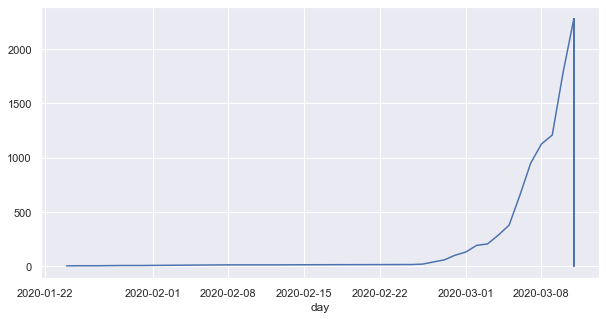

In [19]:
epidemie_df[epidemie_df['Country/Region'] == 'France'].set_index('day')['Confirmed'].plot(figsize=(10, 5));

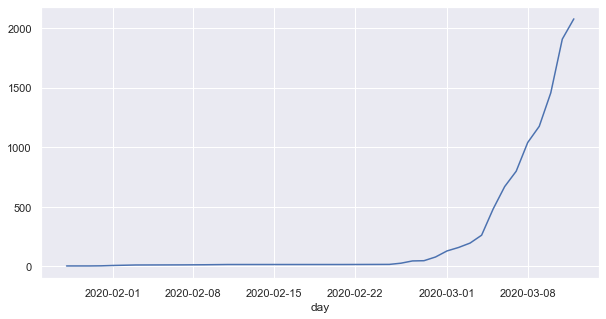

In [20]:
epidemie_df[epidemie_df['Country/Region'] == 'Germany'].set_index('day')['Confirmed'].plot(figsize=(10, 5));

In [21]:
epidemie_df = (pd.read_csv(os.path.join(PROCESSED_DIR, ALL_DATA_FILE), parse_dates=['Last Update'])
               .assign(day=lambda _df: _df['Last Update'].dt.date))

In [22]:
epidemie_df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,source,day
0,Anhui,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN,31.8257,117.2264,01-22-2020.csv,2020-01-22
1,Beijing,Mainland China,2020-01-22 17:00:00,14.0,NaN,NaN,40.1824,116.4142,01-22-2020.csv,2020-01-22
2,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,NaN,NaN,30.0572,107.8740,01-22-2020.csv,2020-01-22
3,Fujian,Mainland China,2020-01-22 17:00:00,1.0,NaN,NaN,26.0789,117.9874,01-22-2020.csv,2020-01-22
4,Gansu,Mainland China,2020-01-22 17:00:00,NaN,NaN,NaN,36.0611,103.8343,01-22-2020.csv,2020-01-22


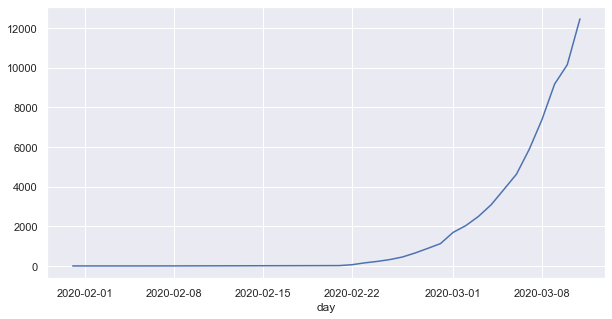

In [23]:
epidemie_df[epidemie_df['Country/Region'] == 'Italy'].set_index('day')['Confirmed'].plot(figsize=(10, 5));

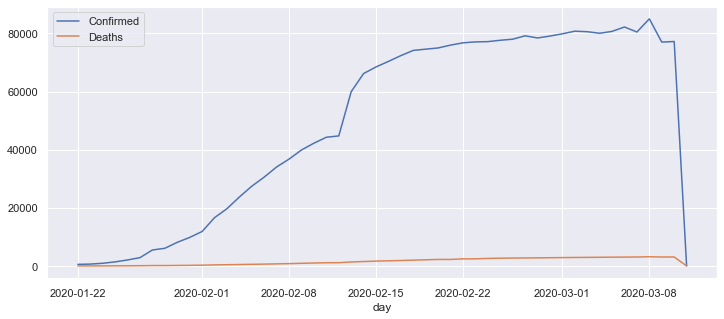

In [24]:
(epidemie_df[epidemie_df['Country/Region'] == 'Mainland China']
 .fillna(value=0)
 .groupby('day')
 .agg({'Confirmed' : 'sum', 'Deaths' : 'sum'})
).plot(figsize=(12,5));

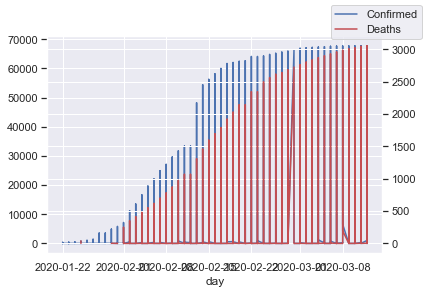

In [25]:
import matplotlib.pyplot as plt

ax = epidemie_df.plot(x="day", y='Confirmed', legend=False)
ax2 = ax.twinx()
epidemie_df.set_index('day').plot(y="Deaths", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

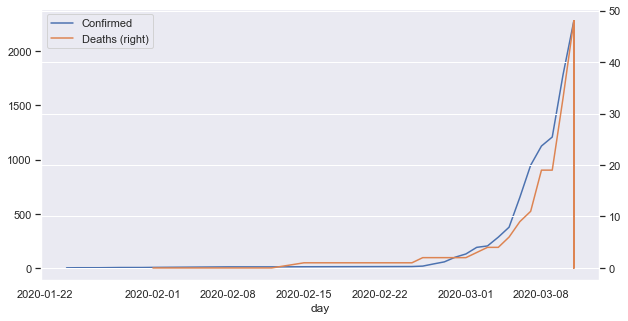

In [26]:
(epidemie_df[epidemie_df['Country/Region'] == 'France']
.set_index('day')[ ['Confirmed', 'Deaths'] ]
.plot(secondary_y=['Deaths'], figsize=(10, 5))
);

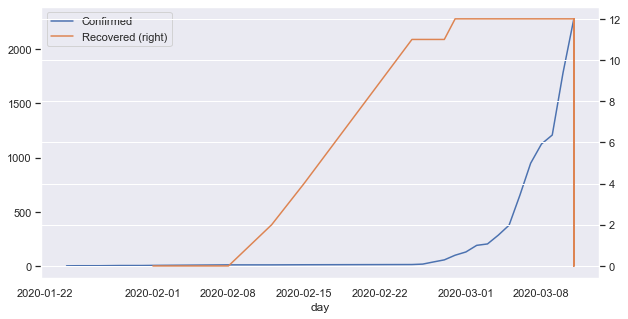

In [27]:
(epidemie_df[epidemie_df['Country/Region'] == 'France']
.set_index('day')[ ['Confirmed', 'Recovered'] ]
.plot(secondary_y=['Recovered'], figsize=(10, 5))
);

In [28]:
china_df = (epidemie_df[epidemie_df['Country/Region']== 'Mainland China']
            .groupby('day')
            .agg({'Confirmed' : 'sum', 'Deaths' : 'sum', 'Recovered' : 'sum'})
           )

In [29]:
china_df

,Confirmed,Deaths,Recovered
day,,,
2020-01-22,547.0,17.0,28.0
2020-01-23,639.0,18.0,30.0
2020-01-24,916.0,26.0,36.0
2020-01-25,1399.0,42.0,39.0
2020-01-26,2062.0,56.0,49.0
2020-01-27,2863.0,82.0,58.0
2020-01-28,5494.0,131.0,101.0
2020-01-29,6070.0,133.0,120.0
2020-01-30,8124.0,171.0,135.0


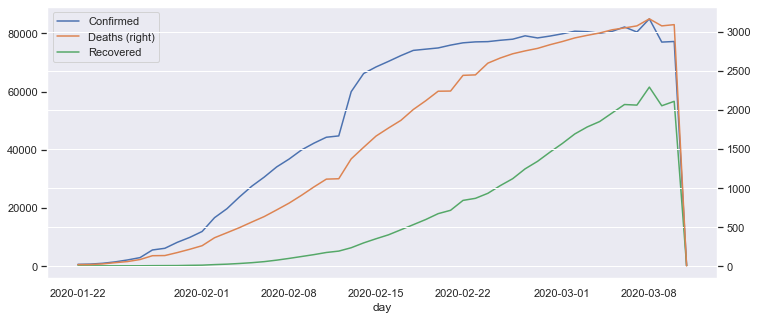

In [30]:
china_df.plot(secondary_y=['Deaths'], figsize=(12,5));

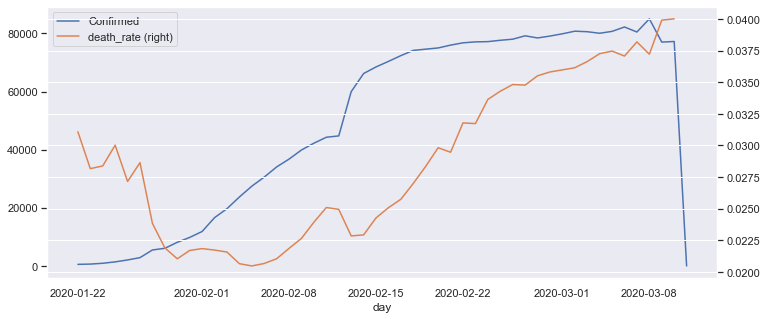

In [31]:
(china_df
 .assign(death_rate=lambda _df: _df['Deaths'] / _df['Confirmed'])
 [['Confirmed', 'death_rate']]
 .plot(secondary_y=['death_rate'],figsize=(12,5))
);

In [32]:
EUROPE = ['France', 'Germany', 'UK', 'Spain']

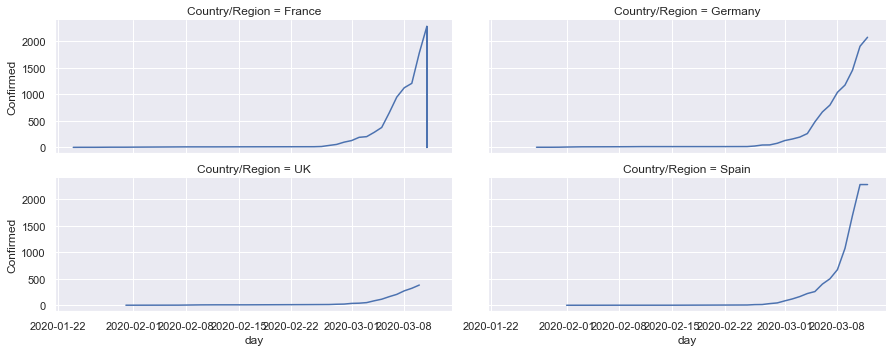

In [33]:
g = sns.FacetGrid(epidemie_df[epidemie_df['Country/Region'].isin(EUROPE)],
                 col='Country/Region',col_wrap=2, height=2.5, aspect=2.5)
g=g.map(plt.plot, 'day', 'Confirmed');

In [34]:
#import chart-studio.plotly as py
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import init_notebook_mode, plot, iplot

In [35]:
france_df = epidemie_df[epidemie_df['Country/Region']=='France']

In [37]:
data = [go.Scatter(x=france_df['day'],
                   y=france_df['Confirmed'],
                   name='Confirmés/France'
                   ),
        go.Scatter(x=epidemie_df[epidemie_df['Country/Region'] == 'Germany']['day'],
                   y=epidemie_df[epidemie_df['Country/Region'] == 'Germany']['Confirmed'],
                   name='Confirmés/Allemagne'
                   )
        ]
    
layout = dict(
    title = "Epidémie Corona Virus",
    xaxis = dict(range = ['2020-01-22', '2020-03-05'])
)
    
fig = dict(data=data, layout=layout)
py.iplot(fig)